# EDA Exploratory Data Analysis
## DataSet StackSample: 10% of Stack Overflow Q&A
https://www.kaggle.com/datasets/stackoverflow/stacksample

### Motivacion
Escogi este dataset porque es un dataset de preguntas y respuestas de temas tecnicos, en donde se puede hacer una solucion NLP con base a las tags que ya se tienen, para entrenar un modelo de clasificacion de texto.

### Descripcion del data set
El data set contiene 3 archivos que son:
* **Questions.csv**: Contiene las preguntas de stackoverflow y tiene la siguiente estructura
    * Id: Identificador de la pregunta
    * OwnerUserId: Identificador del usuario que pregunta
    * CreationDate: Fecha de creacion de la pregunta
    * ClosedDate: Fecha de cierre de la pregunta
    * Score: Puntuacion de la pregunta
    * Title: Titulo de la pregunta
    * Body: Cuerpo de la pregunta
* **Answers.csv**: Contiene las respuestas de las preguntas y tiene la siguiente estructura
    * Id: Identificador de la respuesta
    * OwnerUserId: Identificador del usuario que responde
    * CreationDate: Fecha de creacion de la respuesta
    * ParentId: Identificador de la pregunta a la que responde
    * Score: Puntuacion de la respuesta
    * Body: Cuerpo de la respuesta
* **Tags.csv**: Contiene las etiquetas de las preguntas y tiene la siguiente estructura
    * Id: Identificador de la etiqueta
    * Tag: Nombre de la etiqueta


### Objetivo
El objetivo de este notebook es hacer un analisis exploratorio de los datos, para ver que tipo de datos tenemos y como podemos utilizarlos para entrenar un modelo de clasificacion de texto.

### Importar librerias

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


### Definicion de funciones

In [46]:
def read_data(file_path):
    """
    Lee un archivo CSV y lo carga en un DataFrame de pandas.

    Parámetros
    ----------
    file_path: str
        Ruta al archivo CSV que se desea leer.

    Retorna
    -------
    pandas.DataFrame
        DataFrame con los datos cargados desde el archivo CSV.
    """
    data = pd.read_csv(file_path, encoding="ISO-8859-1")
    return data

In [47]:
def get_dfs_info(*dfs):
    """
    Muestra información básica de uno o varios DataFrames.

    Parámetros
    ----------
    *dfs: pandas.DataFrame
        Uno o varios DataFrames cuyos detalles se desean imprimir.

    Comportamiento
    -------------
    Para cada DataFrame recibido, imprime:
    - Un encabezado indicando el número de orden del DataFrame.
    - La longitud (número de filas).
    - El resultado de `df.info()` con resumen de columnas, tipos y memoria.
    """
    for i, df in enumerate(dfs, 1):
        print(f"--- DataFrame {i} ---")
        print("length:", len(df))
        df.info()
        print("\n")

In [48]:
import pandas as pd

def review_data_quality(questions, answers, tags):
    """
    Revisa y reporta la calidad de tres DataFrames: preguntas, respuestas y etiquetas.

    Parámetros
    ----------
    questions : pandas.DataFrame
        DataFrame con las preguntas, debe incluir al menos la columna 'Title'.
    answers : pandas.DataFrame
        DataFrame con las respuestas.
    tags : pandas.DataFrame
        DataFrame con las etiquetas, debe incluir la columna 'Tag'.

    Comportamiento
    -------------
    - Imprime el conteo de valores nulos en cada DataFrame y en 'Tag'.
    - Elimina las filas de `tags` cuyo campo 'Tag' sea nulo.
    - Calcula e imprime el número de filas duplicadas en cada DataFrame.
    - Verifica y notifica si hay títulos repetidos en `questions['Title']`.

    Retorna
    -------
    None

    """
    print("Nulos en questions:\n", questions.isnull().sum())
    print("\nNulos en answers:\n", answers.isnull().sum())
    print("\nNulos en tags:\n", tags.isnull().sum())
    nulos_tag_col = tags['Tag'].isnull().sum()
    print(f"\nNulos en la columna 'Tag' de tags: {nulos_tag_col}")

    tags = tags.dropna(subset=['Tag'])

    duplicated_questions = questions.duplicated().sum()
    duplicated_answers = answers.duplicated().sum()
    duplicated_tags = tags.duplicated().sum()
    print(f"\nDuplicados en questions: {duplicated_questions}")
    print(f"Duplicados en answers: {duplicated_answers}")
    print(f"Duplicados en tags: {duplicated_tags}")

    duplicated_title = questions['Title'].duplicated().sum()
    if duplicated_title > 0:
        print(f"\nHay {duplicated_title} títulos repetidos en la columna Title.")
    else:
        print("\nNo hay títulos repetidos en la columna Title.")

### Lectura de datos

Leemos los 3 data sets que vamos a utilizar para el analisis, que son:
- **Questions.csv**: Contiene las preguntas de stackoverflow
- **Answers.csv**: Contiene las respuestas de las preguntas
- **Tags.csv**: Contiene las etiquetas de las preguntas

Para esto utilizamos la funcion read_data que definimos anteriormente

In [49]:
questions = read_data('../data/input/Questions.csv')

In [50]:
answers = read_data('../data/input/Answers.csv')

In [51]:
tags = read_data('../data/input/Tags.csv')

### Exploracion de datos

Utilizamos la funcion get_dfs_info para ver la estructura de los data sets y ver que tipo de datos tenemos

In [52]:
get_dfs_info(questions, answers, tags)

--- DataFrame 1 ---
length: 1264216
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264216 entries, 0 to 1264215
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Id            1264216 non-null  int64  
 1   OwnerUserId   1249762 non-null  float64
 2   CreationDate  1264216 non-null  object 
 3   ClosedDate    55959 non-null    object 
 4   Score         1264216 non-null  int64  
 5   Title         1264216 non-null  object 
 6   Body          1264216 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 67.5+ MB


--- DataFrame 2 ---
length: 2014516
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014516 entries, 0 to 2014515
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Id            int64  
 1   OwnerUserId   float64
 2   CreationDate  object 
 3   ParentId      int64  
 4   Score         int64  
 5   Body          object 
dtypes: float64(1)

Exploramos los primeros valores del data set para ver que tipo de datos tenemos

In [53]:
questions.head(10)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...
9,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [54]:
answers.head(10)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."
5,332,59.0,2008-08-02T03:00:24Z,330,19,<p>I would be a bit reluctant to use nested cl...
6,344,100.0,2008-08-02T04:18:15Z,260,6,<p>You might be able to use IronRuby for that....
7,359,119.0,2008-08-02T06:16:23Z,260,5,"<P>You could use any of the DLR languages, whi..."
8,473,49.0,2008-08-02T15:33:13Z,470,8,"<p>No, what you're doing is fine. Don't let th..."
9,529,86.0,2008-08-02T18:16:07Z,180,3,<p>Isn't it also a factor which order you set ...


In [55]:
tags.head(10)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
5,90,branch
6,90,branching-and-merging
7,120,sql
8,120,asp.net
9,120,sitemap


Vamos a revisar como se comportan los tags en el data set

In [ ]:
grouped_tags = tags.dropna(subset=['Tag']).groupby('Id')['Tag'].apply(list).reset_index()

In [ ]:
all_tags = [tag for sublist in grouped_tags['Tag'] for tag in sublist]
tag_counts = Counter(all_tags)

In [ ]:
top_tags = pd.DataFrame(tag_counts.most_common(20), columns=['Tag', 'Count'])

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Tag', data=top_tags)
plt.title('Top 20 etiquetas más frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Etiqueta')
plt.tight_layout()
plt.show()

In [ ]:
grouped_tags['TagCount'] = grouped_tags['Tag'].apply(len)

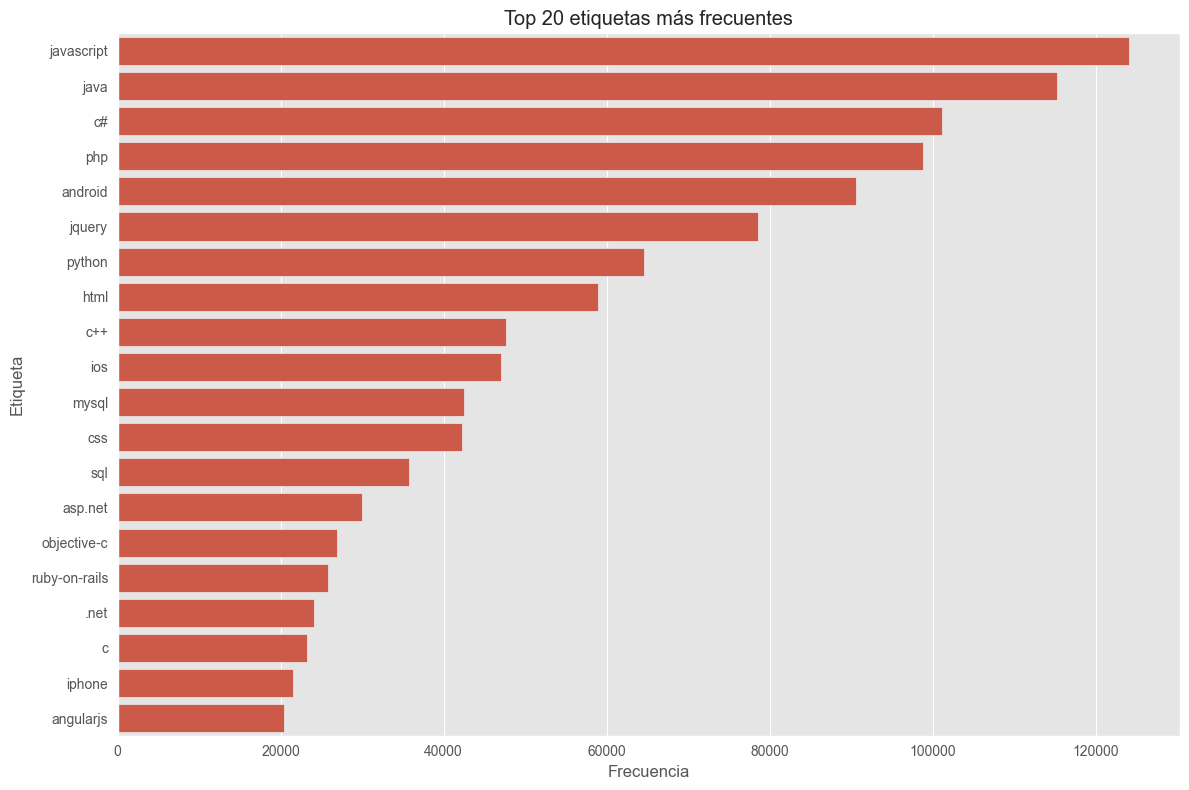

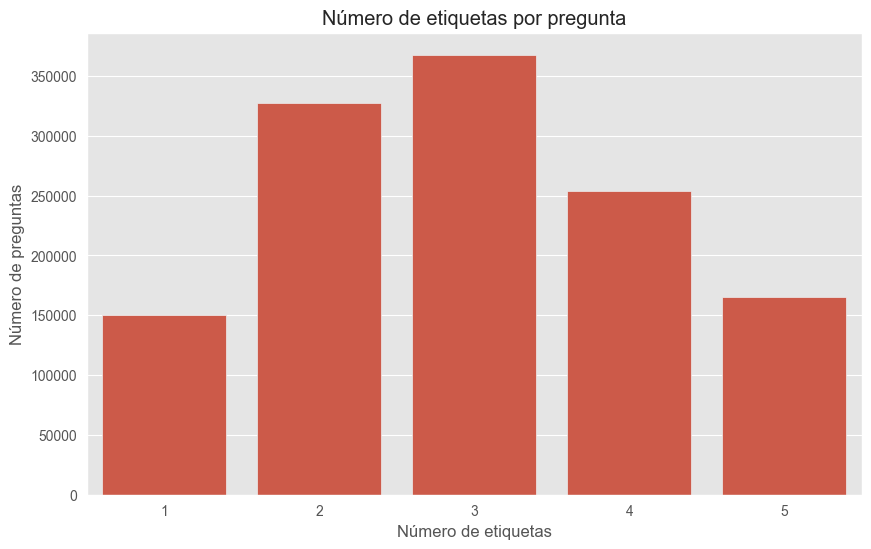

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TagCount', data=grouped_tags)
plt.title('Número de etiquetas por pregunta')
plt.xlabel('Número de etiquetas')
plt.ylabel('Número de preguntas')
plt.show()

### Revision de la calidad de datos

Vamos a revisar la calidad de los datos para poder tomar decisiones de como vamos a trabajar con ellos


In [57]:
review_data_quality(questions, answers, tags)

Nulos en questions:
 Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

Nulos en answers:
 Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64

Nulos en tags:
 Id        0
Tag    1113
dtype: int64

Nulos en la columna 'Tag' de tags: 1113

Duplicados en questions: 0
Duplicados en answers: 0
Duplicados en tags: 0

Hay 221 títulos repetidos en la columna Title.


In [58]:
questions.isnull().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64

### Informacion relevante de los dataframes
Despues de ver los dataframes, podemos concluir la siguiente informacion:
- **Questions.csv** tiene 3 columnas que son importantes para nuestro analisis, que son:
	- Id: Identificador de la pregunta
	- Title: Titulo de la pregunta
	- Body: Cuerpo de la pregunta
- Las demas columnas no son relevantes para nuestro analisis, porque:
	- OwnerUserId: No es relevante porque no nos interesa saber quien hizo la pregunta
	- CreationDate: No es relevante porque no nos interesa saber cuando se hizo la pregunta
	- ClosedDate: No es relevante porque no nos interesa saber cuando se cerro la pregunta
	- Score: No es relevante porque no nos interesa saber la puntuacion de la pregunta
- **Tags.csv** las 2 columnas  son importantes para nuestro analisis:
	- Id: Identificador de la etiqueta
	- Tag: Nombre de la etiqueta

### Conclusion
Despues de ver la estructura y toda la informacion de el data set, vamos a hacer uso de los archivos **Questions.csv** y el de **Tags.csv**, ya que son las que nos sirve para realizar un analisis de las tags por preguntas, como proximos pasos se podria validad como se comportaria el modelo agregando la iunformacion de **Answers.csv**